In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = '../data/NN/point_history.csv'
model_save_path = '../data/NN/point_history_classifier.hdf5'
NUM_CLASSES = 4
TIME_STEPS = 16
DIMENSION = 2
RANDOM_SEED = 42

In [ ]:
data = pd.read_csv(dataset, header=None)
X_dataset = data.iloc[:, 1:(TIME_STEPS * DIMENSION) + 1].values.astype('float32')
y_dataset = data.iloc[:, 0].values.astype('int32')
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])


In [7]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 16, 2)             0         
                                                                 
 dropout_2 (Dropout)         (None, 16, 2)             0         
                                                                 
 lstm (LSTM)                 (None, 16)                1216      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 dense_4 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,430
Trainable params: 1,430
Non-traina

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/32 [===================>..........] - ETA: 0s - loss: 1.3782 - accuracy: 0.3370
Epoch 1: saving model to ../data/NN\point_history_classifier.hdf5
32/32 [==============================] - 2s 19ms/step - loss: 1.3777 - accuracy: 0.3706 - val_loss: 1.3733 - val_accuracy: 0.4751
Epoch 2/1000
23/32 [====================>.........] - ETA: 0s - loss: 1.3702 - accuracy: 0.4378
Epoch 2: saving model to ../data/NN\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 1.3681 - accuracy: 0.4459 - val_loss: 1.3599 - val_accuracy: 0.4841
Epoch 3/1000
23/32 [====================>.........] - ETA: 0s - loss: 1.3494 - accuracy: 0.4732
Epoch 3: saving model to ../data/NN\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 1.3456 - accuracy: 0.4733 - val_loss: 1.3191 - val_accuracy: 0.5234
Epoch 4/1000
30/32 [===========================>..] - ETA: 0s - loss: 1.3005 - accuracy: 0.4909
Epoch 4: saving model to ../da

In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 260ms/step
[9.8701584e-01 1.2976467e-03 6.2570575e-04 1.1060780e-02]
0


42/42 [==============================] - 0s 2ms/step


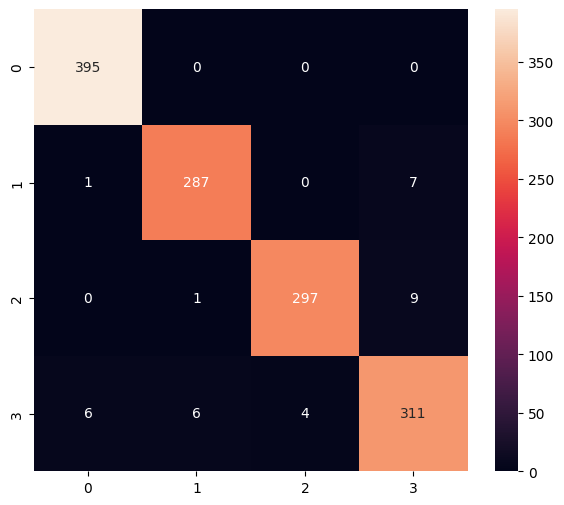

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       395
           1       0.98      0.97      0.97       295
           2       0.99      0.97      0.98       307
           3       0.95      0.95      0.95       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [ ]:
tflite_save_path = '../models/point_history_classifier.tflite'

In [18]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)  
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MAELST~1\AppData\Local\Temp\tmp9_pg7k6m\assets


INFO:tensorflow:Assets written to: C:\Users\MAELST~1\AppData\Local\Temp\tmp9_pg7k6m\assets


ConverterError: c:\Users\Maelstorm\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\saved_model\save.py:1276:0: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
c:\Users\Maelstorm\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\saved_model\save.py:1276:0: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

NameError: name 'tflite_results' is not defined